In [144]:
import pandas as pd
import numpy as np 
import re

In [145]:
df = pd.read_csv(r'movies_profi.csv')

In [146]:
df.head()

,Month,Day,Title,Link,List,Year,Genres,Budget,Box office
0,1,2.0,The Woman in Black: Angel of Death,/wiki/The_Woman_in_Black:_Angel_of_Death,"['supernatural horror', '$15 million[6]', '$48...",2015.0,supernatural horror,$15 million[6],$48.9 million[1]
1,1,9.0,Taken 3,/wiki/Taken_3,"['-language French action-thriller', '$48 mill...",2015.0,-language French action-thriller,$48 million[2],$326.4 million[2]
2,1,16.0,Blackhat,/wiki/Blackhat_(film),"[' action thriller', '$70 million[3]', '$19.7 ...",2015.0,action thriller,$70 million[3],$19.7 million[3]
3,1,16.0,Spare Parts,/wiki/Spare_Parts_(2015_film),"['drama', '$4 million[2]', '$3.6 million[3]']",2015.0,drama,$4 million[2],$3.6 million[3]
4,1,16.0,The Wedding Ringer,/wiki/The_Wedding_Ringer,"[' buddy romantic comedy', '$23 million[4]', '...",2015.0,buddy romantic comedy,$23 million[4],$79.8 million[4]


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       1032 non-null   int64  
 1   Day         1032 non-null   float64
 2   Title       1032 non-null   object 
 3   Link        1032 non-null   object 
 4   List        1032 non-null   object 
 5   Year        1032 non-null   float64
 6   Genres      1032 non-null   object 
 7   Budget      1032 non-null   object 
 8   Box office  1032 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 72.7+ KB


### Cleaning the Budget col

In [148]:
df['Budget'] = df['Budget'].str.split('[').str.get(0)
df['Box office'] = df['Box office'].str.split('[').str.get(0)
df.tail()

,Month,Day,Title,Link,List,Year,Genres,Budget,Box office
1027,12,16.0,Avatar: The Way of Water,/wiki/Avatar:_The_Way_of_Water,"[' epic science fiction', '$350–460\xa0million...",2022.0,epic science fiction,$350–460 million,$2.32 billion
1028,12,21.0,Puss in Boots: The Last Wish,/wiki/Puss_in_Boots:_The_Last_Wish,"[' animated adventure comedy', '$90–110 millio...",2022.0,animated adventure comedy,$90–110 million,$484.6 million
1029,12,23.0,Babylon,/wiki/Babylon_(2022_film),"[' epic period black comedy-drama', '$78–80 mi...",2022.0,epic period black comedy-drama,$78–80 million,$63.4 million
1030,12,23.0,Whitney Houston: I Wanna Dance with Somebody,/wiki/Whitney_Houston:_I_Wanna_Dance_with_Some...,"[' biographical musical drama', '$45 million[1...",2022.0,biographical musical drama,$45 million,$59.8 million
1031,12,29.0,A Man Called Otto,/wiki/A_Man_Called_Otto,"[' comedy-drama', '$50 million', '$113.2 milli...",2022.0,comedy-drama,$50 million,$113.2 million


In [149]:
df.rename(columns={'Budget':'Budget2'}, inplace=True)

In [150]:
df['Budget2'] = df['Budget2'].str.replace(r'–', '-')

In [151]:
mask = df['Budget2'].str.find('-')
mask = mask != -1

In [152]:
(df.loc[mask, 'Budget2'].str.find('million') == -1).any()

False

In [153]:
def get_mean_budget(x):
    pattern = r'\$?([\d\.]*)-\$?([\d\.]*)'
    try:
        finds = re.findall(pattern, x)[0]
        return (float(finds[0]) + float(finds[1])) / 2
    except:
        pattern = r'\$?([\d\.]*)[\s\w]*-[\s\$]?([\d\.]*)'
        finds = re.findall(pattern, x)[0]
        return (float(finds[0]) + float(finds[1])) / 2      


df['Budget'] = df.loc[mask, 'Budget2'].apply(get_mean_budget)

In [154]:
df.loc[mask, 'Budget'][:5]

9      85.0
14    193.0
15    102.5
16     67.0
20     87.5
Name: Budget, dtype: float64

In [155]:
mask = df['Budget'].isna()

In [156]:
(df.loc[mask, 'Budget2'].str.find('million') == -1).sum()

19

In [157]:
mask2 = (df.loc[mask, 'Budget2'].str.find('million') == -1)
df[mask].loc[mask2, 'Budget2']

82                 $100,000
84                 $100,000
200                $900,000
343                $500,000
356                 $80,000
402                $900,000
413                $880,000
659     $66 thousand (est.)
666                $586,443
671                £850,000
730                $500,000
734                $200,000
788               <$300,000
797                $250,000
871                $250,000
885                $950,000
902                $100,000
988                $500,000
1003               $250,000
Name: Budget2, dtype: object

In [158]:
df.loc[659, 'Budget'] = 0.066

In [159]:
def thousands_budget(x):
    pattern = r'.?\$(\d+),'
    try:
        finds = re.findall(pattern, x)[0]
        return float(finds) / 1000
    except:
        return 0.066
    
df.loc[(mask & mask2), 'Budget'] = df[mask].loc[mask2, 'Budget2'].apply(thousands_budget)

In [160]:
df.loc[(mask & mask2), 'Budget'][0:5]

82     0.10
84     0.10
200    0.90
343    0.50
356    0.08
Name: Budget, dtype: float64

In [161]:
# mask = df['Budget'].isna()

mask2 = (df.loc[mask, 'Budget2'].str.find('million') != -1)
df.loc[(mask2 & mask), 'Budget2'][:7]

0    $15 million
1    $48 million
2    $70 million
3     $4 million
4    $23 million
5     $4 million
6     $2 million
Name: Budget2, dtype: object

In [162]:
def millions_budget(x):
    pattern = r'[\$€£](\d+)'
    finds = re.findall(pattern, x)
    if len(finds) == 0:
        print('Error' + x)
    else:
        return float(finds[0])

df.loc[(mask & mask2), 'Budget'] = df[mask].loc[mask2, 'Budget2'].apply(millions_budget)

In [163]:
df.loc[(mask & mask2), 'Budget'][:7]

0    15.0
1    48.0
2    70.0
3     4.0
4    23.0
5     4.0
6     2.0
Name: Budget, dtype: float64

In [164]:
df['Budget'].isna().sum()

0

### Cleaning Box office col

In [165]:
mask = (df['Box office'].str.find('million') == -1)
mask.sum()

118

In [166]:
df.loc[mask, 'Box office'][0:15]

6                                 $400,000
8                                 $408,918
18                                $139,436
21                                $145,427
39    $18,687,388 (Theatrical Performance)
44                          $1.515 billion
52                                $108,808
53                                $478,595
57                          $1.403 billion
58                                $774,780
68                                $933,847
73                          $1.671 billion
81                          $1.159 billion
84                                $935,900
85       $100,044 (Theatrical Performance)
Name: Box office, dtype: object

In [167]:
mask2 = (df['Box office'].str.find('billion') == -1)
mask2.sum()

1002

In [168]:
df.loc[(mask & mask2), 'Box office'][0:15]

6                                  $400,000
8                                  $408,918
18                                 $139,436
21                                 $145,427
39     $18,687,388 (Theatrical Performance)
52                                 $108,808
53                                 $478,595
58                                 $774,780
68                                 $933,847
84                                 $935,900
85        $100,044 (Theatrical Performance)
106                                $483,938
118                                $422,746
124                                 $90,777
136                                 $70,958
Name: Box office, dtype: object

In [169]:
df.rename(columns={'Box office':'Box office2'}, inplace=True)

In [170]:
pattern = r'\$([\d,\.]+)'

df.loc[(mask & mask2),'Box office'] = df.loc[(mask & mask2),
                          'Box office2'].str.findall(pattern).str.get(0).str.replace(',', '').replace('.', '').astype('int32') / 1000000

In [171]:
df.loc[(mask & mask2),'Box office'].min()

0.000618

In [172]:
df.loc[(mask & mask2),'Box office'][:10]

6      0.400000
8      0.408918
18     0.139436
21     0.145427
39    18.687388
52     0.108808
53     0.478595
58     0.774780
68     0.933847
84     0.935900
Name: Box office, dtype: float64

In [173]:
mask = (df['Box office2'].str.find('million') != -1)
df.loc[mask,'Box office'] = df.loc[mask,
                          'Box office2'].str.findall(pattern).str.get(0).astype(float)

In [174]:
df.loc[mask,['Box office', 'Box office2']][:7]

,Box office,Box office2
0,48.9,$48.9 million
1,326.4,$326.4 million
2,19.7,$19.7 million
3,3.6,$3.6 million
4,79.8,$79.8 million
5,52.4,$52.4 million
7,47.3,$47.3 million


In [175]:
mask = (df['Box office2'].str.find('billion') != -1)
mask.sum()

30

In [176]:
df['Box office'].isna().sum()

30

In [177]:
df.loc[mask, 'Box office'] = df.loc[mask, 'Box office2'].str.findall(pattern).str.get(0).astype(float) * 1000

In [178]:
df.loc[mask, ['Box office','Box office2']][:5]

,Box office,Box office2
44,1515.0,$1.515 billion
57,1403.0,$1.403 billion
73,1671.0,$1.671 billion
81,1159.0,$1.159 billion
157,2071.0,$2.071 billion


### Cleaning Genres

In [179]:
df['Genres'] = df['Genres'].str.replace('-', ' ').str.strip().str.split(' ')

In [180]:
df['Genres'].apply(len).value_counts()

Genres
2     432
3     249
1     187
4     108
5      31
6       6
15      3
11      2
13      2
16      2
7       2
25      1
10      1
22      1
23      1
12      1
21      1
14      1
34      1
Name: count, dtype: int64

In [181]:
df.loc[(df['Genres'].apply(len) > 5), 'Genres'][:5]

156    [comedy, film, directed, by, Jason, Moore,, wr...
164    [adult, stop, motion, animated, psychological,...
193    [dystopian, science, fiction, action, film, di...
234    [fantasy, adventure, film, directed, and, co, ...
377    [action, crime, thriller, film, written, and, ...
Name: Genres, dtype: object

In [182]:
df.loc[(df['Genres'].apply(len) == 4), 'Genres'][:5]

1           [language, French, action, thriller]
9          [animated, jukebox, musical, fantasy]
12            [found, footage, science, fiction]
16    [live, action/animated, adventure, comedy]
21            [musical, romantic, comedy, drama]
Name: Genres, dtype: object

In [183]:
df = df[(df['Genres'].apply(len) < 5)]

In [184]:
from sklearn.preprocessing import MultiLabelBinarizer

s = df['Genres']

mlb = MultiLabelBinarizer()

df_genres = pd.DataFrame(mlb.fit_transform(s),columns=mlb.classes_, index=df.index)
df_genres.head()

,,",",American,Belgian,Christian,Christmas,French,Gothic,II,Neo,...,the,thriller,tragicomedy,up,urban,vigilante,war,western,white,zombie
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [185]:
(df_genres.sum(axis=0) > 15).sum()

24

In [186]:
col_genres = df_genres.columns.to_series()
col_genres.head()

                      
,                    ,
American      American
Belgian        Belgian
Christian    Christian
dtype: object

In [187]:
col_to_keep = col_genres[(df_genres.sum(axis=0) > 10)].index.to_list()

In [188]:
df_genres = df_genres[col_to_keep]
df_genres.head()

,Christian,Western,action,adventure,animated,biographical,black,buddy,comedy,crime,...,psychological,romantic,science,slasher,sports,spy,superhero,supernatural,thriller,war
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0


In [189]:
df = pd.concat([df, df_genres], axis=1)
df.head()

,Month,Day,Title,Link,List,Year,Genres,Budget2,Box office2,Budget,...,psychological,romantic,science,slasher,sports,spy,superhero,supernatural,thriller,war
0,1,2.0,The Woman in Black: Angel of Death,/wiki/The_Woman_in_Black:_Angel_of_Death,"['supernatural horror', '$15 million[6]', '$48...",2015.0,"[supernatural, horror]",$15 million,$48.9 million,15.0,...,0,0,0,0,0,0,0,1,0,0
1,1,9.0,Taken 3,/wiki/Taken_3,"['-language French action-thriller', '$48 mill...",2015.0,"[language, French, action, thriller]",$48 million,$326.4 million,48.0,...,0,0,0,0,0,0,0,0,1,0
2,1,16.0,Blackhat,/wiki/Blackhat_(film),"[' action thriller', '$70 million[3]', '$19.7 ...",2015.0,"[action, thriller]",$70 million,$19.7 million,70.0,...,0,0,0,0,0,0,0,0,1,0
3,1,16.0,Spare Parts,/wiki/Spare_Parts_(2015_film),"['drama', '$4 million[2]', '$3.6 million[3]']",2015.0,[drama],$4 million,$3.6 million,4.0,...,0,0,0,0,0,0,0,0,0,0
4,1,16.0,The Wedding Ringer,/wiki/The_Wedding_Ringer,"[' buddy romantic comedy', '$23 million[4]', '...",2015.0,"[buddy, romantic, comedy]",$23 million,$79.8 million,23.0,...,0,1,0,0,0,0,0,0,0,0


### Ordinate the dataframe

In [190]:
df['Profit'] = df['Box office'] - df['Budget']
df['Profit perc'] = df['Profit'] * 100/ df['Budget']
df[['Box office', 'Budget', 'Profit', 'Profit perc']][:5]

,Box office,Budget,Profit,Profit perc
0,48.9,15.0,33.9,226.000000
1,326.4,48.0,278.4,580.000000
2,19.7,70.0,-50.3,-71.857143
3,3.6,4.0,-0.4,-10.000000
4,79.8,23.0,56.8,246.956522


In [191]:
new_col = [
    'Title','Budget','Profit','Box office','Profit perc',
    'Year','Month','Day'
]

new_col = new_col + col_to_keep

In [192]:
df[new_col[1:]] = df[new_col[1:]].astype('float32')

In [193]:
df = df[new_col]
df[new_col[:10]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 976 entries, 0 to 1031
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        976 non-null    object 
 1   Budget       976 non-null    float32
 2   Profit       976 non-null    float32
 3   Box office   976 non-null    float32
 4   Profit perc  976 non-null    float32
 5   Year         976 non-null    float32
 6   Month        976 non-null    float32
 7   Day          976 non-null    float32
 8   Christian    976 non-null    float32
 9   Western      976 non-null    float32
dtypes: float32(9), object(1)
memory usage: 49.6+ KB


## Exploration of Correlation

In [194]:
genres = col_to_keep

In [195]:
df[genres].corrwith(df['Budget']).sort_values(ascending=False).to_frame().T

,superhero,epic,fantasy,fiction,science,adventure,animated,action,spy,musical,...,crime,biographical,Christian,psychological,thriller,supernatural,comedy,romantic,horror,drama
0,0.381174,0.218444,0.204676,0.166939,0.162864,0.154471,0.15183,0.148407,0.091746,0.062906,...,-0.080266,-0.088123,-0.088997,-0.092628,-0.10359,-0.113774,-0.119662,-0.128252,-0.192514,-0.254776


### Profits vs. Genre

This one is a little trickier since there are a lot of outliers principally among the superhero and epic genres since they are the most expensive in terms of budget.

<Axes: >

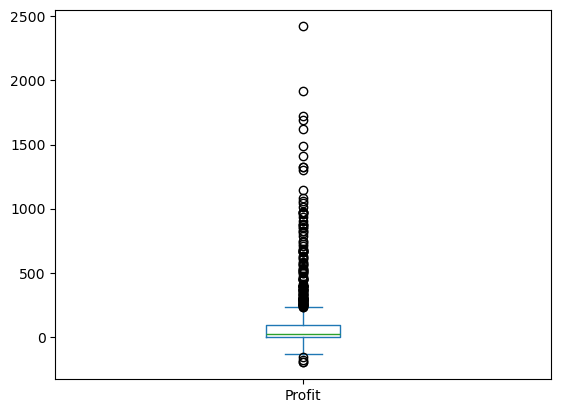

In [196]:
df['Profit'].plot.box()

In [197]:
profit_ulimit = df['Profit'].quantile(0.75) + 1.5*(df['Profit'].quantile(0.75) - df['Profit'].quantile(0.25))
profit_llimit = df['Profit'].quantile(0.25) - 1.5*(df['Profit'].quantile(0.75) - df['Profit'].quantile(0.25))
print(profit_ulimit, profit_llimit)

235.08750462532043 -146.81250262260437


In [198]:
profit_no_outliers = (df['Profit'] < profit_ulimit) & (df['Profit'] > profit_llimit)

<Axes: >

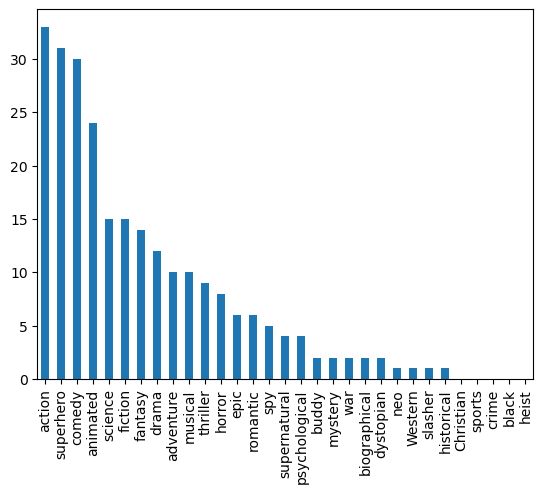

In [199]:
# Finding the most outlier genre

df.loc[~profit_no_outliers, genres].sum().sort_values(ascending=False).plot.bar()

There are way too many outliers and this may compromise the results, especially for genres like action and superhero. This is why I'm going to exclude just the extreme-outliers

In [200]:
profit_ex_ulimit = df['Profit'].quantile(0.75) + 3*(df['Profit'].quantile(0.75) - df['Profit'].quantile(0.25))
profit_ex_llimit = df['Profit'].quantile(0.25) - 3*(df['Profit'].quantile(0.75) - df['Profit'].quantile(0.25))
print(profit_ex_ulimit, profit_ex_llimit)

378.30000734329224 -290.0250053405762


<Axes: >

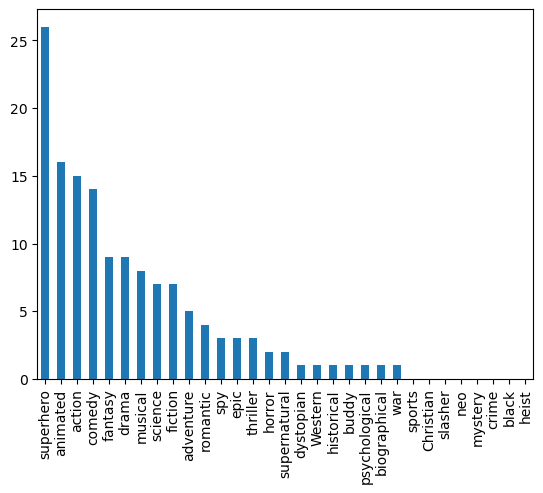

In [201]:
profit_no_ex_outliers = (df['Profit'] < profit_ex_ulimit) & (df['Profit'] > profit_ex_llimit)
df.loc[~profit_no_ex_outliers, genres].sum().sort_values(ascending=False).plot.bar()

There are still too many outliers, so the best way to tackle this is by binning the data based on the budget.

In [202]:
budget_25 = df['Budget'].quantile(0.25)
budget_75 = df['Budget'].quantile(0.75)
print(budget_25, budget_75)

10.0 62.125


In [203]:
low_budget = df['Budget'] < budget_25
mid_budget = (df['Budget'] > budget_25) & (df['Budget'] < budget_75)
high_budget = df['Budget'] < budget_75

## Low-budget analysis

### Profit

In [204]:
def get_profits(x):
    for i in genres:
        if x[i] == 1:
            x[i] = x['Profit']
    return x
        

low_profit_genre = df.loc[low_budget,genres + ['Profit']].T.apply(get_profits, axis=0)
low_profit_genre.iloc[:10,:5]

,3,5,6,8,10
Christian,0.0,0.0,0.0,0.0,0.0
Western,0.0,0.0,0.0,0.0,0.0
action,0.0,0.0,0.0,0.0,0.0
adventure,0.0,0.0,0.0,0.0,0.0
animated,0.0,0.0,0.0,0.0,0.0
biographical,0.0,0.0,0.0,0.0,0.0
black,0.0,0.0,0.0,0.0,0.0
buddy,0.0,0.0,0.0,0.0,0.0
comedy,0.0,0.0,-1.6,0.0,0.0
crime,0.0,0.0,0.0,0.0,0.0


### There are some genres that have too few movies, it's better to discard them

In [244]:
low_profit_genre[low_profit_genre == 0] = np.nan

low_genres = low_profit_genre.T.notna().sum()
low_genres = low_genres[low_genres>4]
low_genres

Christian         11
action             8
biographical       6
black              8
comedy            57
crime              6
drama             96
fiction           10
horror            48
psychological     14
romantic          23
science           11
slasher            6
supernatural      17
thriller          32
Profit           208
dtype: int64

In [245]:
low_genres = low_genres.to_frame().T.columns.tolist()
low_genres = low_genres[:-1]

In [246]:
def get_profits(x):
    for i in low_genres:
        if x[i] == 1:
            x[i] = x['Profit']
    return x

low_profit_genre = df.loc[low_budget,low_genres + ['Profit']].T.apply(get_profits, axis=0)

low_profit_genre[low_profit_genre == 0] = np.nan
median_low_profit_genre = low_profit_genre.drop('Profit').median(axis=1)
median_low_profit_genre[0:9]

Christian        3.900000
action           0.107309
biographical     0.250000
black            0.050000
comedy          -0.100000
crime            0.325000
drama            0.250000
fiction         -0.441672
horror          15.250000
dtype: float32

<Axes: >

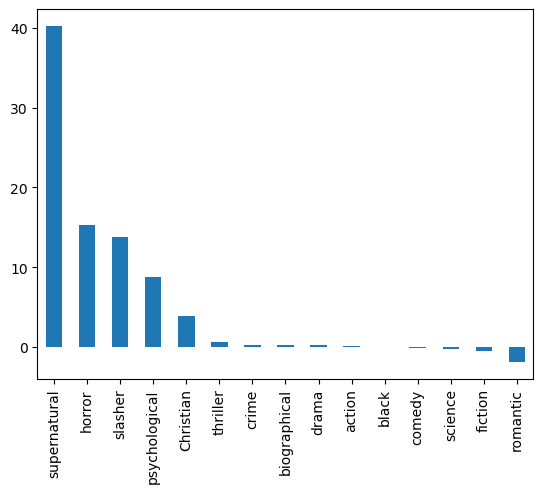

In [247]:
median_low_profit_genre.sort_values(ascending=False).plot.bar()

<Axes: >

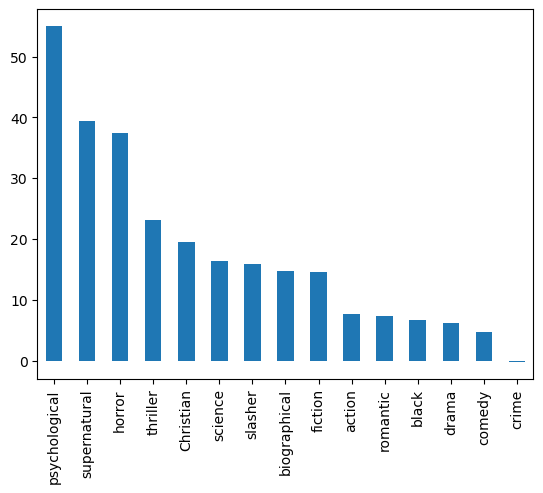

In [248]:
low_profit_genre.drop('Profit').mean(axis=1).sort_values(ascending=False).plot.bar()

<Axes: >

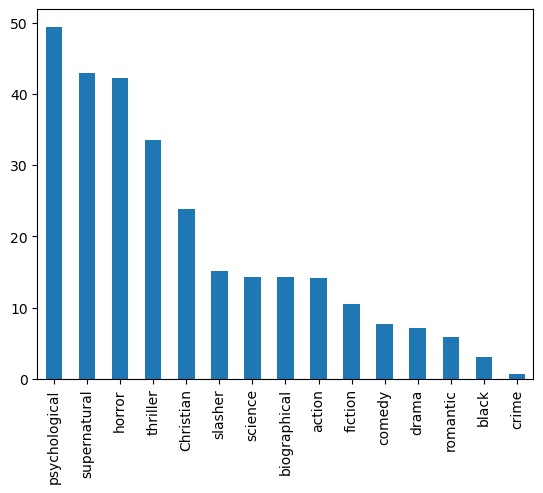

In [252]:
low_profit_genre.drop('Profit').quantile(q=0.75, axis=1).sort_values(ascending=False).plot.bar()

### Profit %

In [258]:
def get_profit_perc(x):
    for i in low_genres:
        if x[i] == 1:
            x[i] = x['Profit perc']
    return x

low_profitperc_genre = df.loc[low_budget,low_genres + ['Profit perc']].T.apply(get_profit_perc, axis=0)
low_profitperc_genre.iloc[:10,:5]

,3,5,6,8,10
Christian,0.0,0.0,0.0,0.0000,0.000000
action,0.0,0.0,0.0,0.0000,0.000000
biographical,0.0,0.0,0.0,0.0000,0.000000
black,0.0,0.0,0.0,0.0000,0.000000
comedy,0.0,0.0,-80.0,0.0000,0.000000
crime,0.0,0.0,0.0,0.0000,0.000000
drama,-10.0,0.0,-80.0,-93.1847,141.111115
fiction,0.0,0.0,0.0,0.0000,0.000000
horror,0.0,0.0,0.0,0.0000,0.000000
psychological,0.0,0.0,0.0,0.0000,0.000000


In [259]:
low_profitperc_genre[low_profitperc_genre == 0] = np.nan

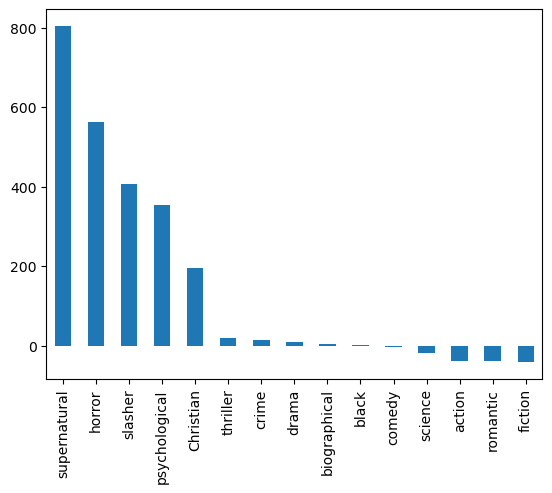

In [263]:
low_profitperc_genre.drop('Profit perc').median(axis=1).sort_values(ascending=False).plot.bar();

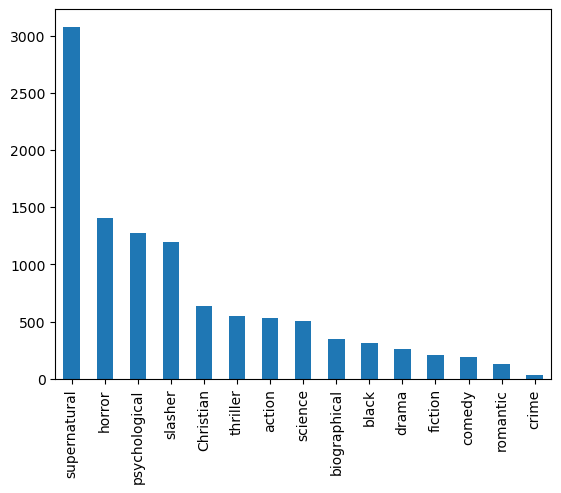

In [264]:
low_profitperc_genre.drop('Profit perc').quantile(q=0.75,axis=1).sort_values(ascending=False).plot.bar();

## Mid-Budget analysis

### Profits

In [268]:
def get_profits(x):
    for i in genres:
        if x[i] == 1:
            x[i] = x['Profit']
    return x
        

mid_profit_genre = df.loc[mid_budget,genres + ['Profit']].T.apply(get_profits, axis=0)
mid_profit_genre.iloc[:10,:5]

,0,1,4,7,11
Christian,0.0,0.000000,0.000000,0.0,0.0
Western,0.0,0.000000,0.000000,0.0,0.0
action,0.0,278.399994,0.000000,-12.7,0.0
adventure,0.0,0.000000,0.000000,0.0,0.0
animated,0.0,0.000000,0.000000,0.0,0.0
biographical,0.0,0.000000,0.000000,0.0,0.0
black,0.0,0.000000,0.000000,0.0,0.0
buddy,0.0,0.000000,56.799999,0.0,0.0
comedy,0.0,0.000000,56.799999,-12.7,0.0
crime,0.0,0.000000,0.000000,0.0,0.0


In [270]:
mid_profit_genre[mid_profit_genre == 0] = np.nan

mid_genres = mid_profit_genre.T.notna().sum()
mid_genres = mid_genres[mid_genres>4]
mid_genres

Christian          5
Western            9
action            91
adventure         23
animated          20
biographical      56
black             10
buddy             10
comedy           164
crime             31
drama            154
dystopian          6
fantasy           16
fiction           28
heist              7
historical        11
horror            53
musical           17
mystery            9
neo               10
psychological     16
romantic          52
science           30
sports            16
superhero          5
supernatural      24
thriller          73
war               10
Profit           473
dtype: int64

In [274]:
mid_genres = mid_genres.to_frame().T.columns.tolist()[:-1]

In [277]:
def get_profits(x):
    for i in mid_genres:
        if x[i] == 1:
            x[i] = x['Profit']
    return x

mid_profit_genre = df.loc[mid_budget,mid_genres + ['Profit']].T.apply(get_profits, axis=0)

In [279]:
mid_profit_genre[mid_profit_genre == 0] = np.nan

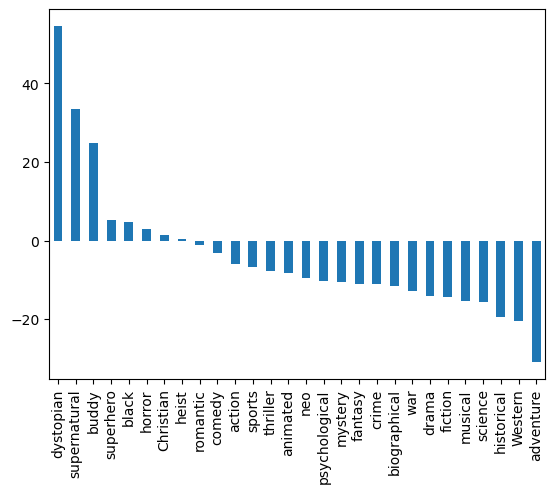

In [282]:
mid_profit_genre.drop('Profit').quantile(q=0.25,axis=1).sort_values(ascending=False).plot.bar();

### Profit %

In [283]:
def get_profit_perc(x):
    for i in mid_genres:
        if x[i] == 1:
            x[i] = x['Profit perc']
    return x

mid_profitperc_genre = df.loc[mid_budget,mid_genres + ['Profit perc']].T.apply(get_profit_perc, axis=0)

mid_profitperc_genre[mid_profitperc_genre == 0] = np.nan

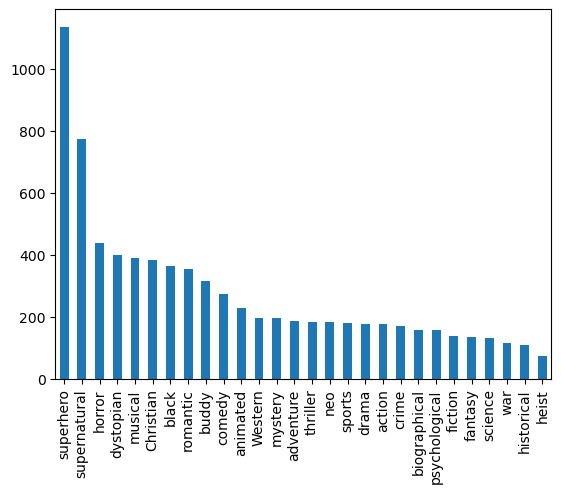

In [286]:
mid_profitperc_genre.drop('Profit perc').quantile(q=0.75,axis=1).sort_values(ascending=False).plot.bar();

## High-Budget analysis

### Profits

In [288]:
def get_profits(x):
    for i in genres:
        if x[i] == 1:
            x[i] = x['Profit']
    return x
        

high_profit_genre = df.loc[high_budget,genres + ['Profit']].T.apply(get_profits, axis=0)

high_profit_genre[high_profit_genre == 0] = np.nan

high_genres = high_profit_genre.T.notna().sum()
high_genres = high_genres[high_genres>7]
high_genres

Christian         17
Western           11
action           104
adventure         24
animated          23
biographical      68
black             19
buddy             11
comedy           232
crime             40
drama            269
dystopian          9
fantasy           21
fiction           39
heist             10
historical        14
horror           111
musical           19
mystery           12
neo               10
psychological     33
romantic          81
science           42
slasher           11
sports            19
superhero         10
supernatural      46
thriller         114
war               14
Profit           731
dtype: int64

In [289]:
high_genres = high_genres.to_frame().T.columns.tolist()[:-1]

def get_profits(x):
    for i in high_genres:
        if x[i] == 1:
            x[i] = x['Profit']
    return x

high_profit_genre = df.loc[high_budget,high_genres + ['Profit']].T.apply(get_profits, axis=0)

In [294]:
high_profit_genre[high_profit_genre == 0] = np.nan

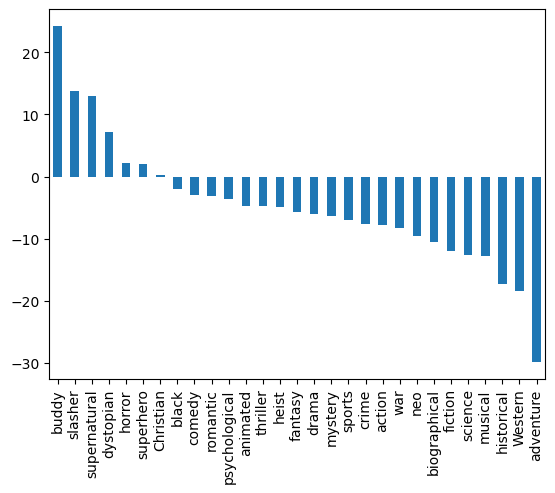

In [299]:
high_profit_genre.drop('Profit').quantile(q=0.25,axis=1).sort_values(ascending=False).plot.bar();

### Profit %

In [300]:
def get_profit_perc(x):
    for i in high_genres:
        if x[i] == 1:
            x[i] = x['Profit perc']
    return x

high_profitperc_genre = df.loc[high_budget,high_genres + ['Profit perc']].T.apply(get_profit_perc, axis=0)

high_profitperc_genre[high_profitperc_genre == 0] = np.nan

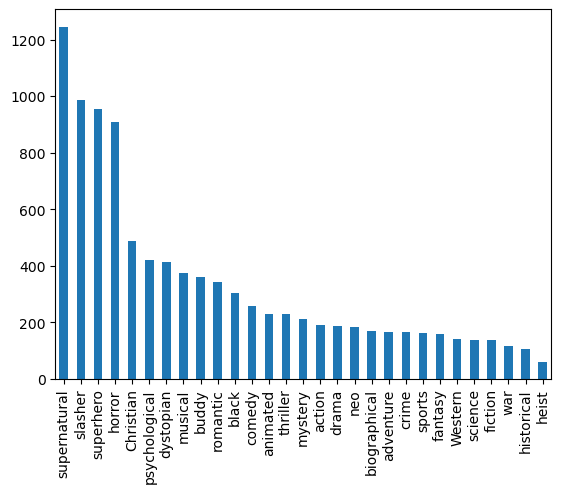

In [303]:
high_profitperc_genre.drop('Profit perc').quantile(q=0.75,axis=1).sort_values(ascending=False).plot.bar();